In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-03-14 13:26:54--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   108MB/s    in 1.3s    

2024-03-14 13:26:56 (108 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import zipfile
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()
#ImageDataGenerator API used to label

In [3]:
import os
train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse04-1.png', 'horse42-5.png', 'horse13-8.png', 'horse21-3.png', 'horse45-3.png', 'horse08-9.png', 'horse33-7.png', 'horse14-6.png', 'horse25-5.png', 'horse49-2.png']
['human13-09.png', 'human17-15.png', 'human01-13.png', 'human01-01.png', 'human10-09.png', 'human13-21.png', 'human17-20.png', 'human12-17.png', 'human16-06.png', 'human01-11.png']


In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4

pic_index = 0

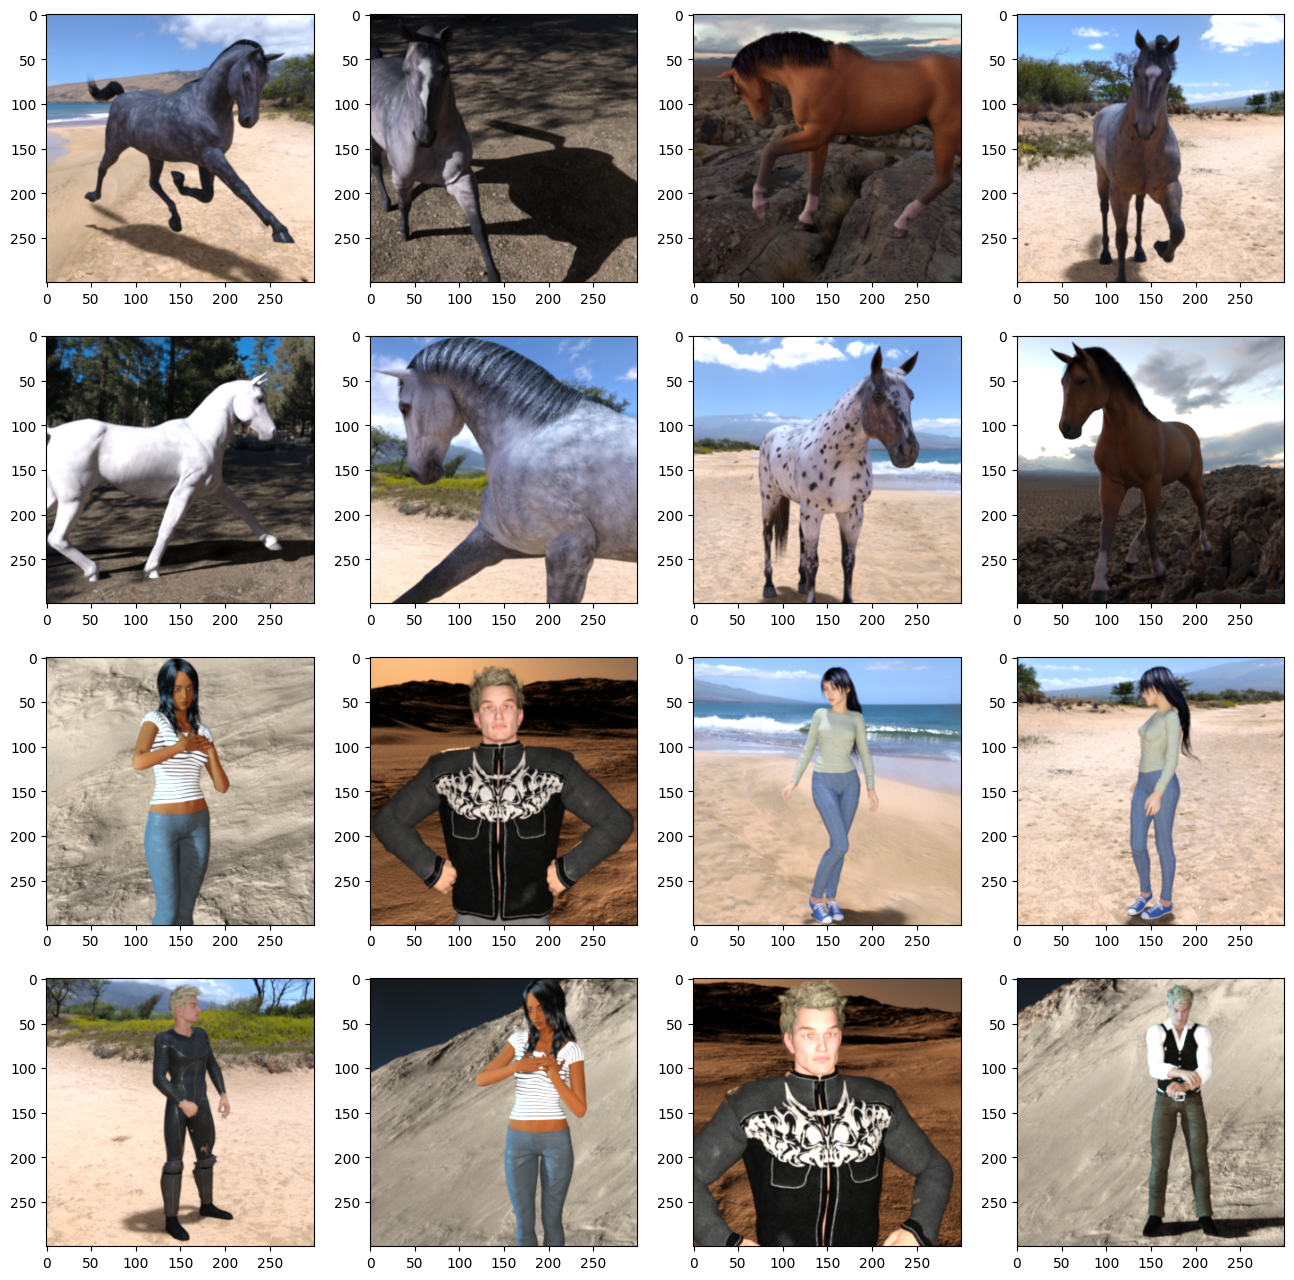

In [7]:
fig = plt.gcf() #current figure gradle
fig.set_size_inches(ncols*4,nrows*4)

pic_index+=8
next_horse_pix =[os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [8]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # 300x300 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron-horses or humans
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [10]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory('./horse-or-human/',target_size=(300, 300),batch_size=128,class_mode='binary')

Found 1027 images belonging to 2 classes.


In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 106s 13s/step - loss: 0.1221 - accuracy: 0.9600
Epoch 2/15
8/8 [==============================] - 103s 12s/step - loss: 0.2292 - accuracy: 0.9355
Epoch 3/15
8/8 [==============================] - 103s 13s/step - loss: 0.2466 - accuracy: 0.9062
Epoch 4/15
8/8 [==============================] - 91s 11s/step - loss: 0.0656 - accuracy: 0.9733
Epoch 5/15
8/8 [==============================] - 92s 13s/step - loss: 0.0429 - accuracy: 0.9844
Epoch 6/15
8/8 [==============================] - 91s 11s/step - loss: 0.0187 - accuracy: 0.9933
Epoch 7/15
8/8 [==============================] - 104s 13s/step - loss: 0.6458 - accuracy: 0.7675
Epoch 8/15
8/8 [==============================] - 103s 12s/step - loss: 0.2463 - accuracy: 0.9004
Epoch 9/15
8/8 [==============================] - 90s 11s/step - loss: 0.1116 - accuracy: 0.9611
Epoch 10/15
8/8 [==============================] - 90s 11s/step - loss: 0.1428 - accuracy: 0.9544
Epoch 11/15
8/8 [=======

In [14]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving download (1).jpeg to download (1).jpeg
1/1 [==============================] - 0s 182ms/step
[0.9981745]
download (1).jpeg is a human


In [ ]:
from google.colab import runtime
runtime.unassign()